# Машинное обучение, DS-поток
## Задание ML.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 30 баллов;
* Задача 2 &mdash; 70 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 60 баллов.

In [ ]:
# Bot check

# HW_ID: ds_ml4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from tqdm import tqdm

sns.set(font_scale=1.3, palette='Set2')

---
### Задача 1

Пусть обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$ такова, что
* объекты $X_1, ..., X_n$ одномерны и имеют распределение $\mathcal{N}(0, \sigma^2)$;
* отклик получается по правилу $Y_i = X_i^2 + \varepsilon_i$, где $\varepsilon_i$ независимы, имеют нулевое среднее и не зависят от $X_i$. 

Пусть также для объекта $X$ отклик $Y$ получен по аналогичному правилу, причем $X$ и $Y$ не зависят от обучающей выборки.

Для МНК-модели $\widehat{y}(x) = \widehat{\theta} x$ выпишите подробное bias-variance разложение со всеми тремя компонентами: смещение, разброс, шум. Компоненту, отвечающую за разброс, разрешается не доводить до конца. Если в выражении присутствует дисперсия $\varepsilon_i$, то так и пишите: $\mathsf{D}\varepsilon_i$.

---
### Задача 2

В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём датасет `california_housing` из библиотеки `sklearn` о стоимости недвижимости в различных округах Калифорнии. Этот датасет состоит из 20640 записей и содержит следующие признаки для каждого округа: `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`. `HouseAge` и `Population` &mdash; целочисленные признаки. Остальные признаки &mdash; вещественные.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

In [4]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

Разбейте данные на train и test, выделив на test 25% данных.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию.

Попробуйте получить зависимость от количества деревьев, обучив лишь **один случайный лес**. В этом вам поможет аттрибут `_estimators` у обученной модели. Последовательно вызывайте predict у каждого дерева и усредняйте полученные результаты.

In [6]:
rfs = []
for depth in range(3, 26):
    rf = RandomForestRegressor(n_estimators=100, max_depth=depth)
    rf.fit(X_train, y_train)
    rfs.append(rf)

In [7]:
mses = []
for rf in rfs:
    pred = rf.predict(X_test)
    mses.append(mean_squared_error(y_test, pred))

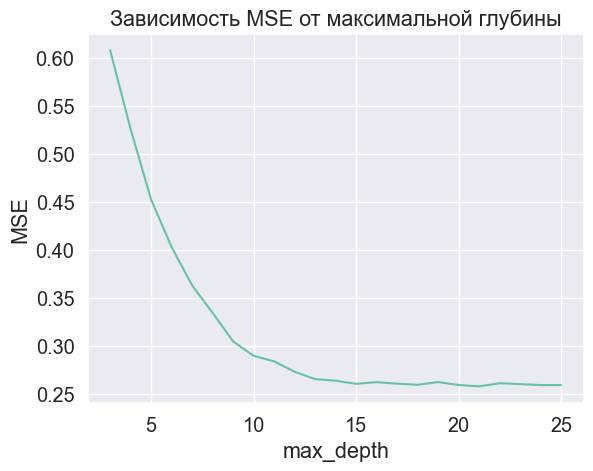

In [8]:
plt.plot(np.arange(3, 26), mses)
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Зависимость MSE от максимальной глубины')
plt.show()

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

mses = []
for n_est in range(1, 101):
    res = []
    for i in range(n_est):
        preds = rf.estimators_[i].predict(X_test)
        res.append(preds)
    preds = np.array(res).mean(axis=0)
    mses.append(mean_squared_error(y_test, preds))

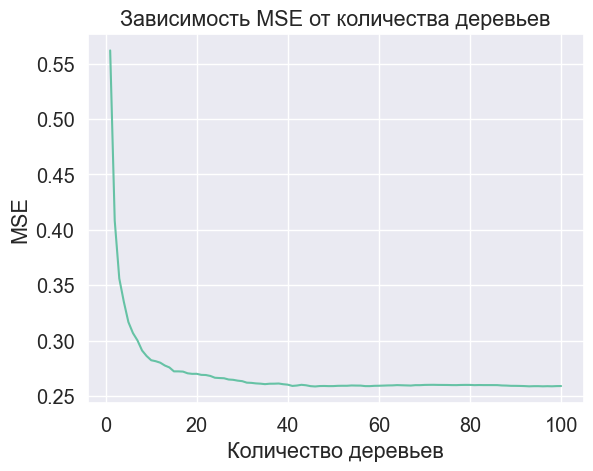

In [11]:
plt.plot(np.arange(1, 101), mses)
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества деревьев')
plt.show()

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:** 
1.
- С ростом максимальной глубины дерева ошибка на тестовой выборке быстро уменьшается до определённого предела, после чего стабилизируется на уровне около 0.25. Это связано с тем, что увеличение глубины дерева позволяет модели лучше учитывать сложные зависимости в данных, но после достижения определённой глубины (примерно 15–20) дерево начинает переобучаться на обучающую выборку, и дальнейшее увеличение глубины уже не даёт прироста качества на тестовой выборке.
  
- Ошибка также уменьшается с увеличением числа деревьев, особенно заметно в диапазоне до 20–30 деревьев. После этого точность модели стабилизируется. Это связано с тем, что увеличение количества деревьев уменьшает влияние случайных ошибок каждого отдельного дерева (уменьшается дисперсия), что приводит к более стабильным и точным прогнозам.

2. С увеличением как максимальной глубины дерева, так и количества деревьев, MSE сначала значительно уменьшается, но затем стабилизируется. Это говорит о том, что после достижения определённых значений этих параметров (глубина около 15 и количество деревьев около 50) дальнейшее увеличение не приводит к значимому улучшению предсказательной способности модели. 

3. Случайный лес практически не подвержен переобучению, что следует из разложения ошибки на bias и variance. При большой глубине деревьев, хотя каждое дерево отдельно может переобучаться, они остаются одинаково распределёнными. Важно, что у всей композиции сохраняется такой же bias, как и у одного дерева, но variance становится значительно меньше за счёт слабой корреляции между деревьями. Это приводит к тому, что итоговая ошибка для случайного леса остаётся низкой.

Обучите случайный лес с параметрами по умолчанию и выведите MSE на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются? Какие источники случайности есть при построении случайного леса и какие из них реализуются в данном случае?

In [19]:
mses = []
for i in range(3):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    mses.append(mean_squared_error(y_test, pred))

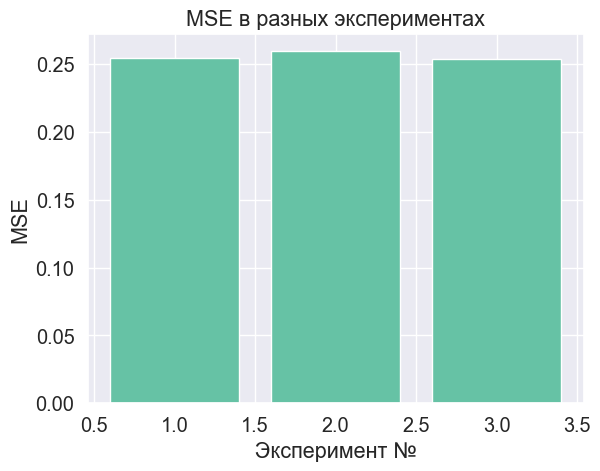

In [18]:
plt.bar(np.arange(1, 4), mses)
plt.xlabel('Эксперимент №')
plt.ylabel('MSE')
plt.title('MSE в разных экспериментах')
plt.show()

**Ответ:** 
Ну по идее результаты должны отличаться, так как лес случайный, то есть деревья обучаются на случайных подвыборках, а также в узлах деревьев разделяющий признак выбирается случайно. Но в нашем случае результаты несильно отличаются.

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

In [20]:
def neg_mse(est, X, y):
    pred = est.predict(X)
    return -mean_squared_error(y, pred)

In [22]:
gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'n_estimators': np.arange(5, 25, 5),
        'max_depth': np.arange(5, 75, 5)
    },
    scoring=neg_mse,
    error_score='raise'
)

gs.fit(X_train, y_train)

GridSearchCV(error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]),
                         'n_estimators': array([ 5, 10, 15, 20])},
             scoring=<function neg_mse at 0x0000026AAF0367A0>)

Выведите найденные оптимальные параметры.

In [23]:
gs.best_params_

{'max_depth': 60, 'n_estimators': 20}

Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [24]:
max_depth = gs.best_params_['max_depth']
n_estimators = gs.best_params_['n_estimators']

Оценим качество предсказаний обученного решающего леса.

In [25]:
rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, pred):3f}')

MSE: 0.269560


Исследуйте зависимость метрики MSE от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [26]:
mses = []
for max_features in range(1, 9):
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features
    )
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    mses.append(mean_squared_error(y_test, pred))

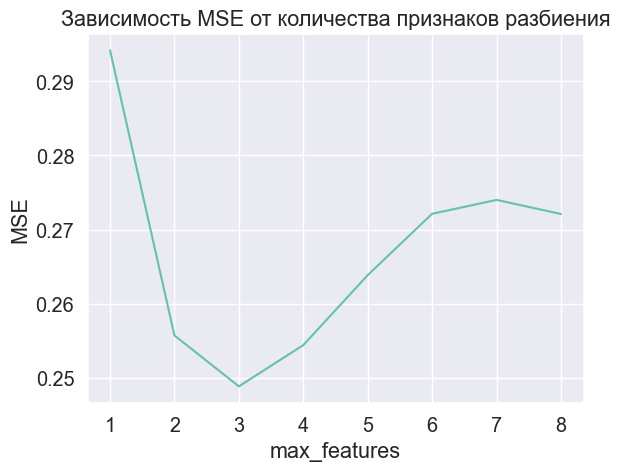

In [27]:
plt.plot(np.arange(1, 9), mses)
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества признаков разбиения')
plt.show()

Видно четкий минимум при количестве признаков = 3.
С дальнейшим увеличением количества признаков увеличивается вероятность повтора признаков в разных деревьях, поэтому возрастают коэффициент корреляции между ними и дисперсия, таким образом, увеличивается ошибка.

Постройте график зависимости метрики MSE на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

In [28]:
mses_train = []
mses_test = []

for max_features in range(1, 9):
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features
    )
    rf.fit(X_train, y_train)
    pred = rf.predict(X_train)
    mses_train.append(mean_squared_error(y_train, pred))
    pred = rf.predict(X_test)
    mses_test.append(mean_squared_error(y_test, pred))

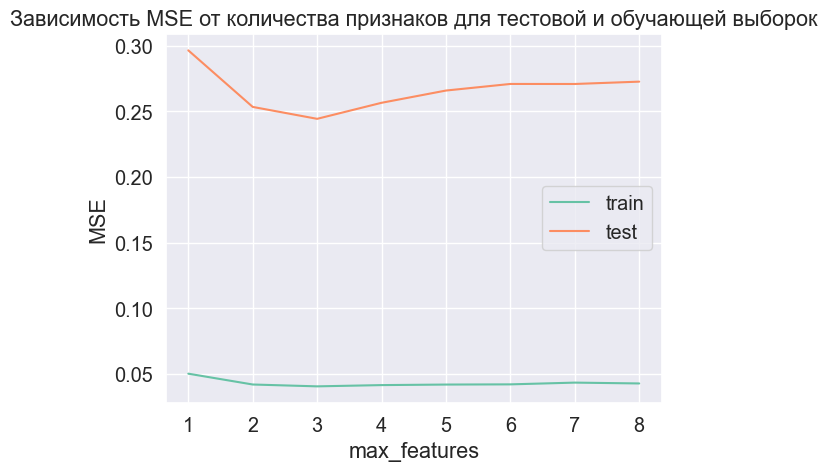

In [29]:
plt.plot(np.arange(1, 9), mses_train, label='train')
plt.plot(np.arange(1, 9), mses_test, label='test')
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества признаков для тестовой и обучающей выборок')
plt.legend()
plt.show()

Почему график получился таким? Как зависит разнообразие деревьев, инными словами их скоррелированность, от величины `n_features`?

**Ответ:** 
График показывает, что ошибка на обучающей выборке почти не меняется, а на тестовой — сначала уменьшается, а затем увеличивается. Это связано с тем, что при большем числе признаков деревья становятся сложнее и более скоррелированными, что ведёт к переобучению и снижению разнообразия моделей. Меньшее количество признаков увеличивает разнообразие деревьев, что снижает корреляцию и улучшает обобщение модели.

Проведите эксперимент, в котором выясните, как изменится качество регрессии, если набор признаков, по которым происходит разбиение в каждой вершине определяется не заново в каждой вершине, а задан заранее для всего дерева. То есть перед каждым построением дерева выбирается новый набор признаков, который будет рассматриваться при построении всех разбиений в этом дереве.

Для реализации данного эксперимента используйте класс беггинг-модели `sklearn.ensemble.BaggingRegressor`, у которого используйте следующие поля:
* `base_estimator` — базовая модель, используйте `sklearn.tree.DecisionTreeRegressor`;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Постройте графики MSE на обучающей и на валидационной выборке в зависимости от числа рассматриваемых признаков в дереве.

In [30]:
mses_train = []
mses_test = []

for max_features in range(1, 9):
    br = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n_estimators,
        max_features=max_features
    )
    br.fit(X_train, y_train)
    pred = br.predict(X_train)
    mses_train.append(mean_squared_error(y_train, pred))
    pred = br.predict(X_test)
    mses_test.append(mean_squared_error(y_test, pred))

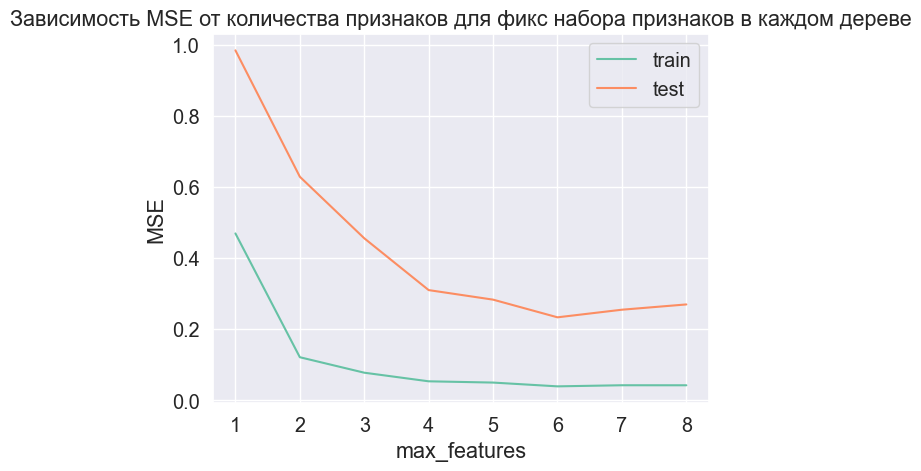

In [31]:
plt.plot(np.arange(1, 9), mses_train, label='train')
plt.plot(np.arange(1, 9), mses_test, label='test')
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества признаков для фикс набора признаков в каждом дереве')
plt.legend()
plt.show()

Сравните результаты обычного случайного леса с только что построенным лесом.

Сделайте выводы. Объясните, чем плох такой подход пострения случайного леса. Какое преимущество мы получаем, когда выбираем случайное подмножество признаков в каждой вершине в обычном случайном лесу? Опирайтесь в своих рассуждениях на bias-variance разложение.

**Вывод.**

В первом подходе ошибка убывает быстрее при маленьком количестве признаков. Однако во втором, она почти не возрастает с дальнейшим увеличением. При этом глобально ошибка меньше в первом случае.
Второй подход хуже, так как фиксированный набор признаков снижает разнообразие деревьев в ансамбле, что приводит к их большей коррелированности. В результате, увеличивается дисперсия модели и общее качество предсказаний ухудшается.

В обычном случайном лесе на каждой вершине дерева выбирается случайное подмножество признаков, что увеличивает разнообразие деревьев и снижает корреляцию между ними. Это, в свою очередь, снижает дисперсию модели без существенного увеличения смещения (bias). Таким образом, случайный лес с выбором случайного подмножества признаков в каждой вершине лучше обобщает данные и устойчив к переобучению

Поясните разницу между следующими конструкциями:

`BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=n_features)`

`BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features=n_features))`

1. Здесь параметр max_features относится к самому BaggingRegressor, а не к базовому регрессору. Это значит, что при построении каждого отдельного дерева BaggingRegressor будет случайным образом выбирать подмножество признаков из всех доступных признаков для обучения. 
2. В этом случае параметр max_features задаётся для каждого базового дерева, т.е. для каждого отдельного DecisionTreeRegressor. Это означает, что каждое дерево будет использовать заданное количество признаков (n_features) при обучении в каждой своей вершине. Однако в отличие от первого случая, сами деревья в ансамбле не будут обучаться на случайных подмножествах признаков — они будут использовать один и тот же набор признаков в каждой вершине.

---
### Задача 3

На лекции получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите беггинг на следующих базовых моделях:
* решающие деревья, можно использовать вариант случайного леса,
* ридж-регрессия.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Их можно получить с помощью поля `estimators_` у обученной беггинг-модели. Для оценки корреляций используйте [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) или [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним.

In [32]:
tr = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100)
rr = BaggingRegressor(estimator=Ridge(), n_estimators=100)

tr.fit(X_train, y_train)
rr.fit(X_train, y_train)

BaggingRegressor(estimator=Ridge(), n_estimators=100)

In [33]:
tr_corr = np.corrcoef(np.array([tr.estimators_[i].predict(X_test) for i in range(100)]))
rr_corr = np.corrcoef(np.array([rr.estimators_[i].predict(X_test) for i in range(100)]))

Найдем во сколько раз уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели.

In [34]:
tr_coef = tr_corr.sum()/10000 + 1/100
rr_coef = rr_corr.sum()/10000 + 1/100
print(f'Decision Tree: {tr_coef:.3f}, Ridge: {rr_coef:.3f}')

Decision Tree: 0.781, Ridge: 0.903


Text(0.5, 1.0, 'Матрица корреляции для Decision Tree')

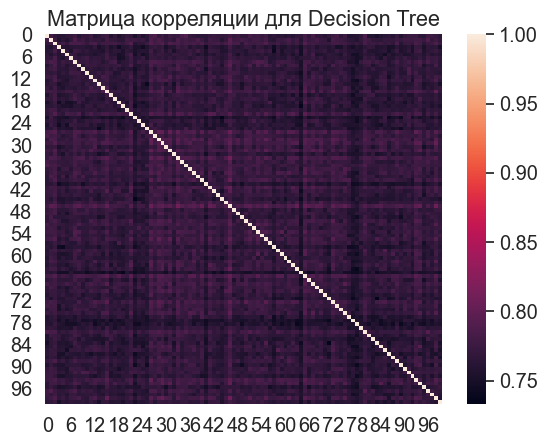

In [35]:
sns.heatmap(tr_corr)
plt.title('Матрица корреляции для Decision Tree')

Text(0.5, 1.0, 'Матрица корреляции для RidgeRegression')

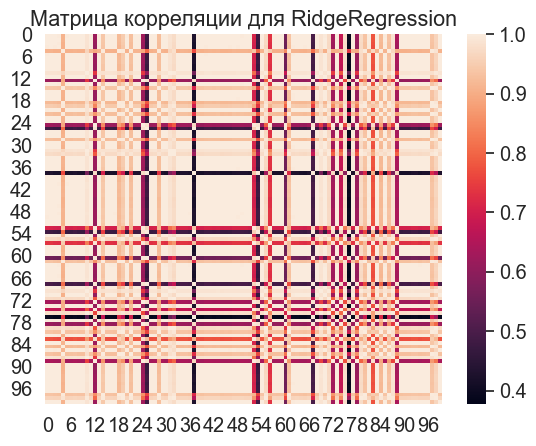

In [37]:
sns.heatmap(rr_corr)
plt.title('Матрица корреляции для RidgeRegression')

Text(0.5, 1.0, 'Гистограмма корреляций')

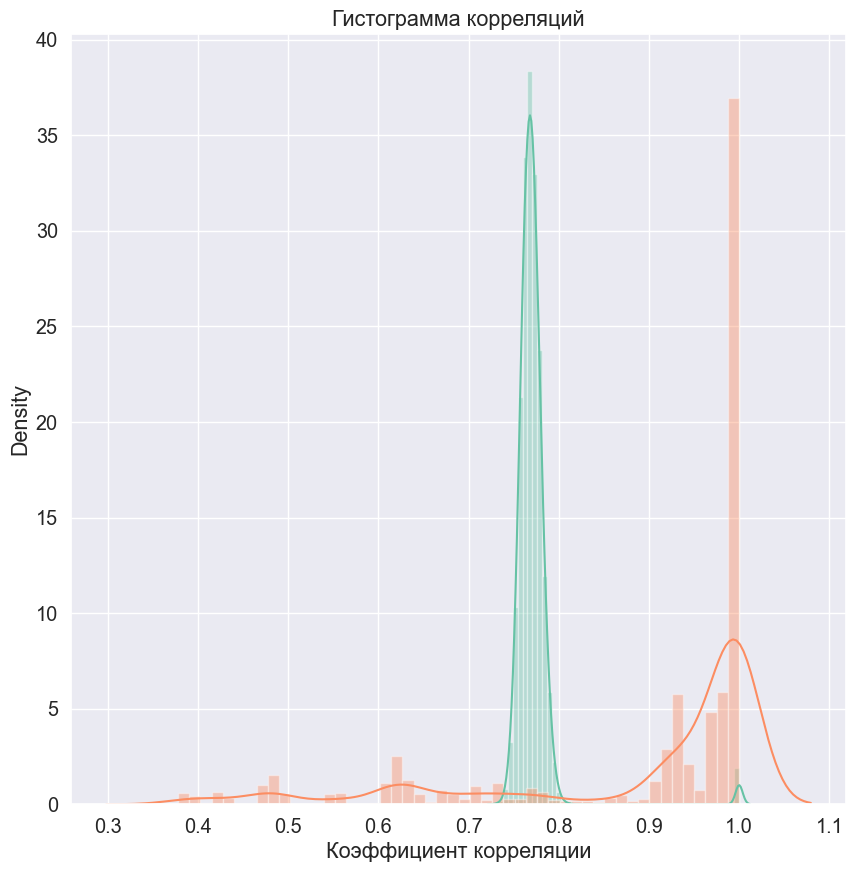

In [38]:
plt.figure(figsize=(10, 10))
sns.distplot(tr_corr)
sns.distplot(rr_corr)
plt.xlabel('Коэффициент корреляции')
plt.title('Гистограмма корреляций')

Эксперимент показал следующее:

- Decision Tree: Корреляции предсказаний моделей в пределах 0.7–0.8, что приводит к снижению дисперсии бэггинга на 22%. Разнообразие между деревьями позволило заметно уменьшить разброс.

- Ridge-регрессия: Корреляции предсказаний часто превышают 0.9, вплоть до 1, что дало лишь 8%-ное уменьшение дисперсии. Высокая корреляция между моделями ограничила эффект бэггинга.

Вывод: бэггинг эффективнее уменьшает дисперсию для Decision Tree из-за большего разнообразия моделей, чем для Ridge-регрессии.

---
### Задача 4

В этой задаче вам предлагается расмотреть и сравнить две стратегии поиска оптимальных значений некоторого функционала: **Grid Search** и **Random Search**. В реальной жизни значение функционала &mdash; это значение целевой метрики качества, а оптимизация идет по гиперпараметрам некоторой модели машинного обучения. Коротко напомним, в чем же заключается каждая стратегия.

* **Grid Search** &mdash; полный перебор по сетке. Суть перебора по сетке заключается в следующем: вы задаете область значений гиперпараметров, которые хотите оптимизировать, обучаете все модели, которые возможно получить в рамках заданного пространства поиска гиперпараметров. Затем выбираете из данных моделей ту, которая дала наилучшее качество на кросс-валидации.
* **Random Search** &mdash; это стратегия, при которой рассматривается некоторая выборка из множества значений гиперпараметров. По умолчанию часто используется равномерное распределение. Лучшая модель выбирается так же на основе кросс-валидации.

Разберем сначала **одномерный случай**. Для этого рассмотрим следующую функцию.

In [39]:
def f(x):
    return 5.2 - 5/(1+(3*(x))**2) - np.cos(x)/5

Поcтройте график функции $f(x)$ на отрезке $[-20, 20]$. В чем его особенность?

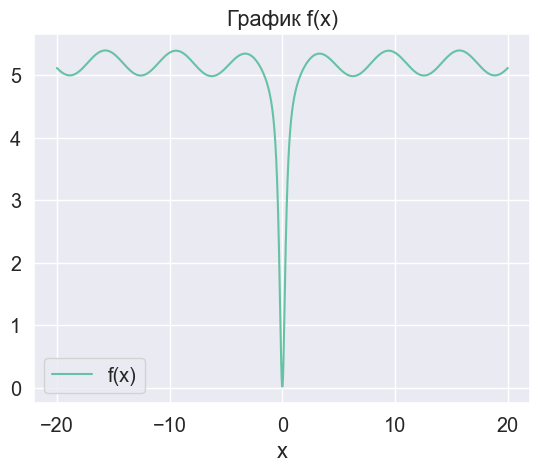

In [40]:
plt.plot(np.linspace(-20, 20, 1000), f(np.linspace(-20, 20, 1000)), label='f(x)')
plt.title('График f(x)')
plt.xlabel('x')
plt.legend()
plt.show()

График похож на -cos(x) с добавлением глобального минимума в нуле. Особенность в том, что много локальных минимумов.

Подумайте, какие проблемы могут возникнуть при поиске минимума этой функции, если используется поиск по сетке?

**Ответ:**  
Можно пропустить глобальный минимум и найти лишь локальный, если например взять слишком широкую сетку.

Рассмотрим **поиск по сетке** и проведем вычислительный эксперимент. Для этого будем генерировать случайное смещение из $U[-0.5, 0.5]$, а затем рассматривать смещенную на $x_0$ сетку размера $n$ на отрезке $[-10, 10]$, после чего поиском по сетке искать оптимальное значение $f$.

In [41]:
# рассматриваемые размеры сеток
grid_size = np.arange(2, 1000)
n_experiments = 100  # количество экспериментов

In [42]:
# массив для минимумов по сетке для текущего эксперимента
grid_min_f_trace = []

for _ in tqdm(range(n_experiments)):
    # случайное смещение сетки на [-0.5, 0.5]
    x_0 = np.random.uniform(-0.5, 0.5)
    # массив для минимумов для текущего размера сетки
    grid_f_min = []
    # цикл по размеру сетки
    for n in grid_size:
        # сетка на [-10, 10] размера n
        grid = np.linspace(-10, 10, n)
        # найденный по сетке со смещением x_0 минимум функции f
        f_min = f(grid + x_0).min()
        # сохраним минимум для сетки размера n
        grid_f_min.append(f_min)
    # сохраним минимумы текущего эксперимента
    grid_min_f_trace.append(grid_f_min)

100%|██████████| 100/100 [00:02<00:00, 34.05it/s]


Для нескольких экспериментов постройте графики значений минимума от количества точек в сетке. 
Для большей наглядности и информативности сразу **зафиксируйте диапазон значений по оси y**, а также отображайте графики в **логарифмическом масштабе**.

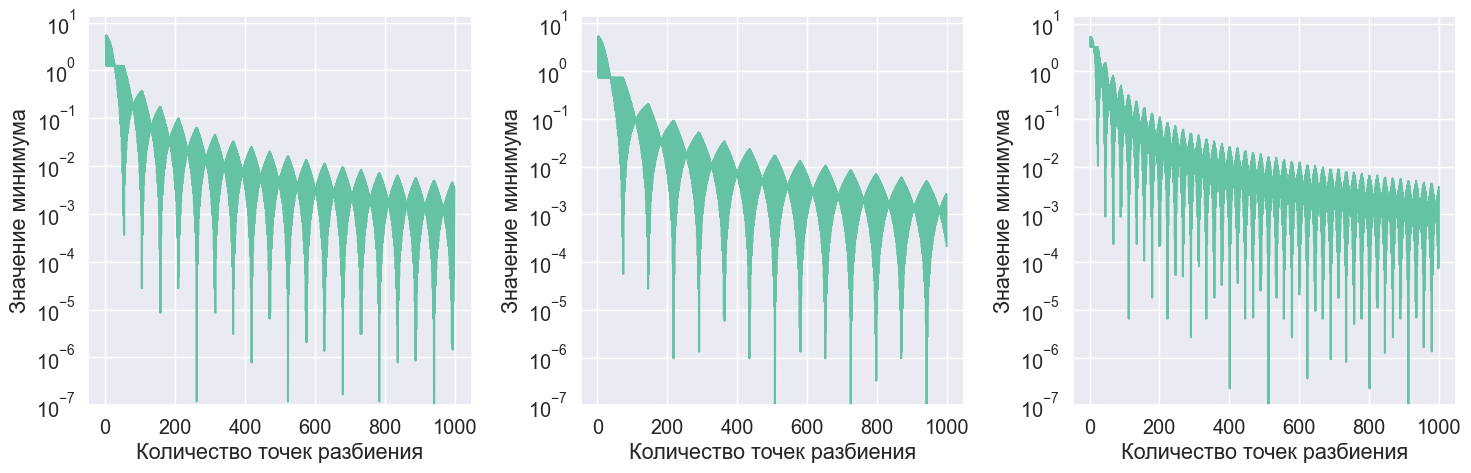

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

y_limits = (10**(-7), 0)
y_scale = 'log'
x_label = 'Количество точек разбиения'
y_label = 'Значение минимума'

indices = [2, 50, 90]

for i in range(3):
    ax[i].plot(grid_size, grid_min_f_trace[indices[i]])
    ax[i].set_yscale(y_scale)
    ax[i].set_ylim(y_limits)
    ax[i].set_xlabel(x_label)
    ax[i].set_ylabel(y_label)

plt.tight_layout()
plt.show()

На всех графиках видно, что минимум в стремится к нулю с увеличением количества точек разбиения. Однако на третьем графике в ноль мы попадаем гораздо чаще по сравнению с первым

Теперь рассмотрим **случайный поиск**. Снова проведем вычислительный эксперимент. Обратите внимание, что случайные точки для эксперимента мы генерируем один раз.

In [45]:
# рассматриваемое количество случайных точек
random_size = np.arange(2, 1000)

In [46]:
# массив для минимумов для текущего эксперимента
random_min_f_trace = []

# цикл по экспериментам
for _ in tqdm(range(n_experiments)):
    # случайное смещение на [-0.5, 0.5]
    x_0 = np.random.uniform(-0.5, 0.5)
    # массив для минимумов для текущего количества точек
    random_min_f = []
    # сгенерируем случайные на [-10, 10] точки сразу
    points = np.random.uniform(-10, 10, size=(random_size[-1]))

    
    #цикл по количеству точек
    for n in random_size:
        # найденный по первым n случайным точкам со смещением x_0 минимум функции f
        f_min = f(points[:n + 1] + x_0).min()
        # сохранение результатов
        random_min_f.append(f_min)
        
    random_min_f_trace.append(random_min_f)

100%|██████████| 100/100 [00:01<00:00, 56.25it/s]


Снова для нескольких экспериментов постройте графики значений минимума от количества точек при случайном поиске.

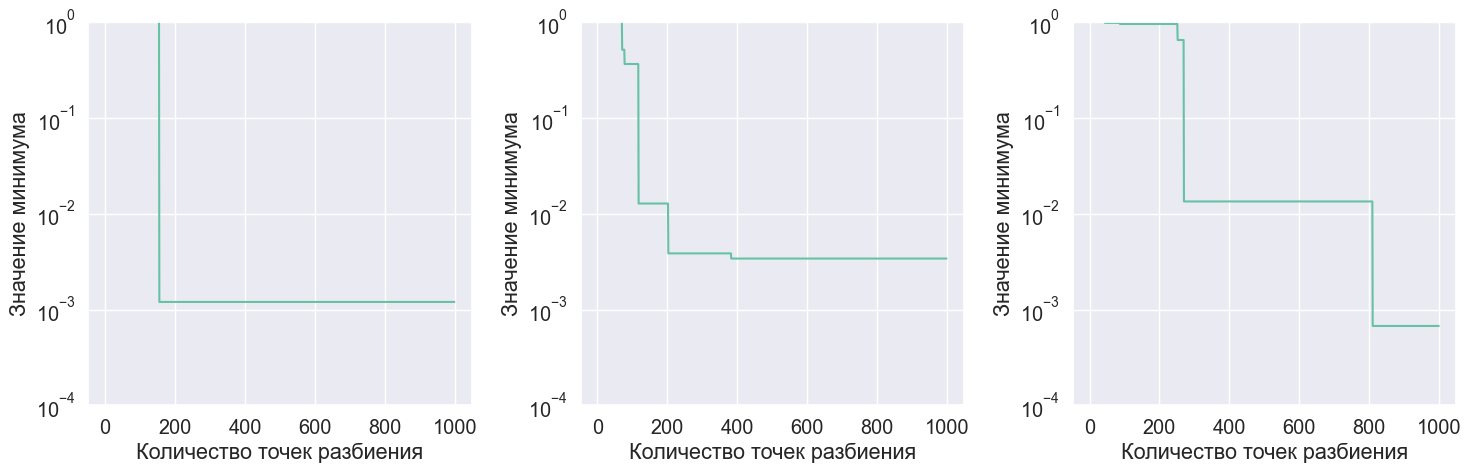

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Define common properties
y_limits = (10**(-4), 1)
y_scale = 'log'
x_label = 'Количество точек разбиения'
y_label = 'Значение минимума'

indices = [2, 50, 90]

for i in range(3):
    ax[i].plot(random_size, random_min_f_trace[indices[i]])
    ax[i].set_yscale(y_scale)
    ax[i].set_ylim(y_limits)
    ax[i].set_xlabel(x_label)
    ax[i].set_ylabel(y_label)

plt.tight_layout()
plt.show()

Тут уже мы скачкообразно стремимся к минимуму, с постоянными интервалами. На это влияет то, что мы сгенерировали случайные числа один раз.

Сравним два метода. Для этого постройте график зависимости найденного минимума от количества точек (случайных или в сетке). Перед этим предварительно усредните результат по количеству экспериментов. Какие результаты у вас получились?

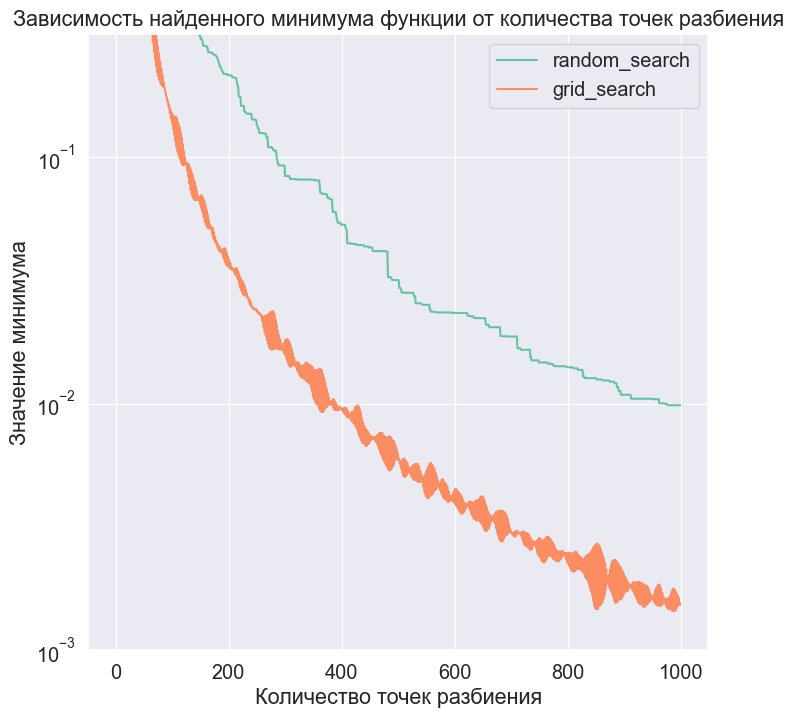

In [56]:
grid_min_f = np.array(grid_min_f_trace).mean(axis=0)
random_min_f = np.array(random_min_f_trace).mean(axis=0)

plt.figure(figsize=(8, 8))
plt.yscale('log')
plt.ylim(10**(-3), 10**(-0.5))
plt.plot(random_size, random_min_f, label='random_search')
plt.plot(grid_size, grid_min_f, label='grid_search')
plt.xlabel('Количество точек разбиения')
plt.ylabel('Значение минимума')
plt.title('Зависимость найденного минимума функции от количества точек разбиения')
plt.legend()
plt.show()

Видим, что независимо от разбиения grid search быстрее находит минимум.

Теперь расмотрим **двумерный случай**, для этого определим следующую функцию:

In [57]:
def f(x, y,):
    return 5.4 - 5/(1+(3*x)**2) - np.cos(x)/5 - np.cos(y)/5

Постройте тепловую карту значений этой функции на $[-20, 20]^2$.

<Axes: >

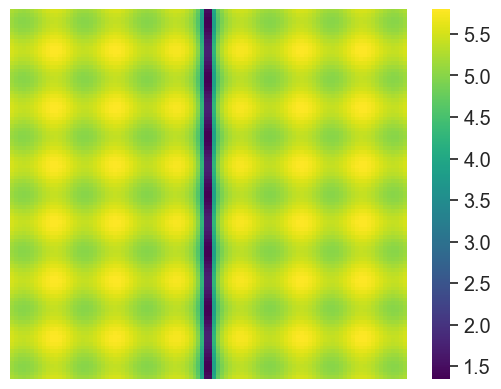

In [60]:
Q = np.array(np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-20, 20, 100))).T.reshape(-1, 2)
x = Q[:, 0]
y = Q[:, 1]
fQ = f(x, y).reshape(-1, 100).T
sns.heatmap(fQ, xticklabels=False, yticklabels=False, cmap="viridis")

Проведите эксперимент, аналогичный одномерному случаю. В случае поиска по сетке рассмотрите сетку размера $n$ на $[-10, 10]$ по каждой координате. Таким образом, общий размер сетки будет $n^2$. Для ускорения вычислений в случае случайного поиска будет достаточно рассмотреть только такое количество точек, которое соответствует рассмотренным размерам сетки (т.е. квадраты чисел).

Сравните результат с полученным ранее. Сделайте вывод.

In [61]:
# рассматриваемые размеры сеток
grid_size = np.arange(2, 500)
n_experiments = 100  # количество экспериментов

# массив для минимумов по сетке для текущего эксперимента
grid_min_f_trace = []

for _ in tqdm(range(n_experiments)):
    # случайное смещение сетки на [-0.5, 0.5]
    x_0 = np.random.uniform(-0.5, 0.5)
    y_0 = np.random.uniform(-0.5, 0.5)
    # массив для минимумов для текущего размера сетки
    grid_f_min = []
    # цикл по размеру сетки
    for n in grid_size:
        # сетка на [-10, 10]^2 размера n
        p = np.array(np.meshgrid(np.linspace(-10, 10, n), np.linspace(-10, 10, n))).T.reshape(-1, 2)
        x = p[:, 0]
        y = p[:, 1]
        # найденный по сетке со смещением x_0 минимум функции f
        f_min = f(x + x_0, y + y_0).min()
        # сохраним минимум для сетки размера n
        grid_f_min.append(f_min)
    # сохраним минимумы текущего эксперимента
    grid_min_f_trace.append(grid_f_min)

100%|██████████| 100/100 [04:43<00:00,  2.84s/it]


In [62]:
# рассматриваемое количество случайных точек
random_size = np.arange(2, 500)

# массив для минимумов для текущего эксперимента
random_min_f_trace = []

# цикл по экспериментам
for _ in tqdm(range(n_experiments)):
    # случайное смещение на [-0.5, 0.5]
    x_0 = np.random.uniform(-0.5, 0.5)
    y_0 = np.random.uniform(-0.5, 0.5)
    # массив для минимумов для текущего количества точек
    random_min_f = []
    # сгенерируем случайные на [-10, 10] точки сразу
    x = np.random.uniform(-10, 10, size=(random_size[-1] * random_size[-1]))
    y = np.random.uniform(-10, 10, size=(random_size[-1] * random_size[-1]))
    #цикл по количеству точек
    for n in random_size:
        # найденный по первым n случайным точкам со смещением x_0 минимум функции f
        f_min = f(x[:n*n] + x_0, y[:n*n] + y_0).min()
        # сохранение результатов
        random_min_f.append(f_min)

    random_min_f_trace.append(random_min_f)

100%|██████████| 100/100 [04:02<00:00,  2.42s/it]


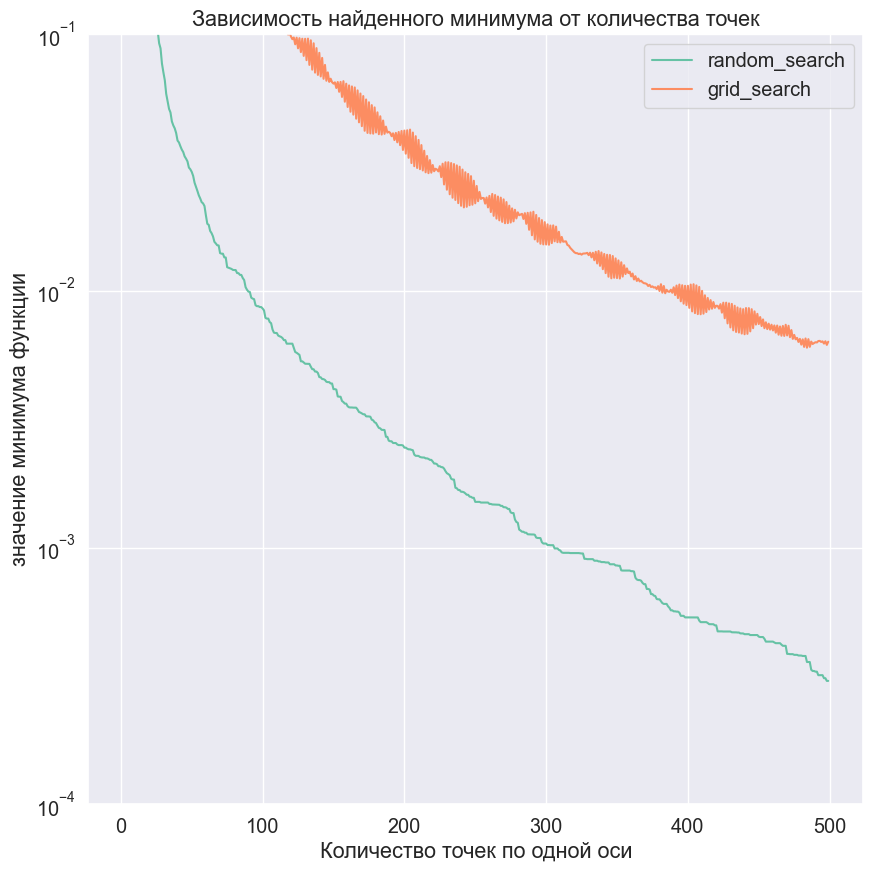

In [63]:
grid_min_f = np.array(grid_min_f_trace).mean(axis=0)
random_min_f = np.array(random_min_f_trace).mean(axis=0)

plt.figure(figsize=(10, 10))
plt.yscale('log')
plt.ylim(10**(-4), 10**(-1))
plt.plot(random_size, random_min_f, label='random_search')
plt.plot(grid_size, grid_min_f, label='grid_search')
plt.xlabel('Количество точек по одной оси')
plt.ylabel('значение минимума функции')
plt.title('Зависимость найденного минимума от количества точек')
plt.legend()
plt.show()

**Вывод:** 
При многомерном поиске random search работает лучше, при одномерном - grid search